### 利用深度学习识别卫星数据

在本次作业中我们将会使用深度学习来解决分类问题。 给定的数据在 “point_data.csv”文件里，这个数据总共包含了5个类别（由Class_ID来区分）, 并包括10个特征。在这里，我们需要搭建多层的神经网络（具体细节在下面给出），并利用这个网络来识别分类。

In [121]:
# 导入library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# TODO 导入跟keras相关的libraray
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD

# 以下是跟sklearn相关的库
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,scale
from sklearn.metrics import f1_score, classification_report,confusion_matrix

In [122]:
# 导入数据

# TODO 设置数据文件的位置(path)
filename = 'point_data.csv'
dataset = pd.read_csv(filename)


In [123]:
encoder = LabelEncoder()

# 定义标签Y和特征X

# TODO: Y: 读取Class_ID字段
Y = dataset.iloc[:, 2:3].values

# TODO：总共10个特征，分别读取 'B2','B3','B4','B5','B6','B7','B8','B8A','B11','B12' 字段
X = dataset.iloc[:, 3:13].values

# TODO: 对Y做一个简单的转换（不然会在keras部分会出错） 
y = encoder.fit_transform(Y)

/Users/lyn/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [124]:
# 把数据分成训练数据和测试数据
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [125]:
# TODO: 做数据的归一化 （利用preprocessing.scale函数，详情查看官方文档）
X_train = scale(X_train)
X_test = scale(X_test)

/Users/lyn/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [126]:
# 定义深度学习模型： 模型总共包含4层hidden layer, 第一层包括50个hidden units, 第二层包括50个hidden units, 第三层包括60个hidden units, 
#                第四层包括40个hidden units. 并在第一层hidden layer和第二层hidden layer之间添加一个dropout layer (rate=0.2),
#                在第二层和第三层hidden layer之间添加dropout layer（rate=0.2）, 第三层和第四层之间添加dropout layer（rate=0.1）。

# TODO: 定义各类变量（比如输入维度的大小，输出维度的大小，hidden layer的unit个数等）
input_shape = (10,)
output_shape = 5

# TODO: 定义深度学习模型
model = Sequential()

model.add(Dense(10, input_shape=input_shape, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(60, activation='relu'))
model.add(Dropout(rate=0.1))
model.add(Dense(40, activation='relu'))
model.add(Dense(output_shape, activation='softmax'))

In [127]:
# 输出模型描述
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_50 (Dense)             (None, 50)                550       
_________________________________________________________________
dropout_25 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_51 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_26 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_52 (Dense)             (None, 60)                3060      
_________________________________________________________________
dropout_27 (Dropout)         (None, 60)                0         
__________

In [128]:
#  定义SGD(stochastic gradient descent优化器)，学习率为0.01.  
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

In [129]:
# 定义模型的compile函数，设置loss为sparse_categorical_crossentropy, 利用上面定义的sgd优化器，利用准确率作为评估标准
model.compile(loss='sparse_categorical_crossentropy',optimizer=sgd, metrics=['accuracy'])

In [136]:
# TODO: 训练模型，设置epoch为100， batch_Size为100，并把训练数据中的15%作为validation data(验证集), 把中间的结果都赋给history变量（后面做分析用）             
history = model.fit(X_train, y_train, epochs=100,batch_size=100,validation_split=0.15)
 

Train on 16282 samples, validate on 2874 samples
Epoch 1/100
16282/16282 [==============================] - 1s 64us/step - loss: 0.8594 - acc: 0.6916 - val_loss: 0.3816 - val_acc: 0.8549
Epoch 2/100
16282/16282 [==============================] - 0s 29us/step - loss: 0.3936 - acc: 0.8589 - val_loss: 0.3250 - val_acc: 0.8907
Epoch 3/100
16282/16282 [==============================] - 0s 29us/step - loss: 0.3353 - acc: 0.8778 - val_loss: 0.2822 - val_acc: 0.8987
Epoch 4/100
16282/16282 [==============================] - 0s 29us/step - loss: 0.2947 - acc: 0.8934 - val_loss: 0.2435 - val_acc: 0.9182
Epoch 5/100
16282/16282 [==============================] - 1s 35us/step - loss: 0.2666 - acc: 0.9047 - val_loss: 0.2341 - val_acc: 0.9186
Epoch 6/100
16282/16282 [==============================] - 0s 30us/step - loss: 0.2495 - acc: 0.9106 - val_loss: 0.2206 - val_acc: 0.9231
Epoch 7/100
16282/16282 [==============================] - 0s 29us/step - loss: 0.2367 - acc: 0.9135 - val_loss: 0.2064 - v

16282/16282 [==============================] - 0s 30us/step - loss: 0.0820 - acc: 0.9714 - val_loss: 0.0817 - val_acc: 0.9749
Epoch 60/100
16282/16282 [==============================] - 0s 29us/step - loss: 0.0838 - acc: 0.9714 - val_loss: 0.0838 - val_acc: 0.9743
Epoch 61/100
16282/16282 [==============================] - 0s 30us/step - loss: 0.0845 - acc: 0.9697 - val_loss: 0.0802 - val_acc: 0.9763
Epoch 62/100
16282/16282 [==============================] - 0s 30us/step - loss: 0.0878 - acc: 0.9700 - val_loss: 0.0825 - val_acc: 0.9763
Epoch 63/100
16282/16282 [==============================] - 1s 31us/step - loss: 0.0815 - acc: 0.9725 - val_loss: 0.0801 - val_acc: 0.9791
Epoch 64/100
16282/16282 [==============================] - 0s 30us/step - loss: 0.0810 - acc: 0.9725 - val_loss: 0.0816 - val_acc: 0.9760
Epoch 65/100
16282/16282 [==============================] - 0s 29us/step - loss: 0.0804 - acc: 0.9729 - val_loss: 0.0828 - val_acc: 0.9756
Epoch 66/100
16282/16282 [==============

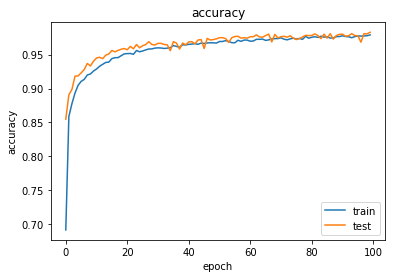

In [137]:
# 画一个图来表示准确率的变化情况（分别在训练数据和测试数据）
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

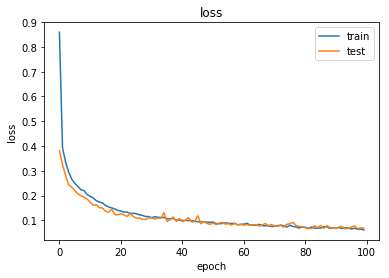

In [138]:
# 画一个图来表示LOSS的变化情况（分别在训练数据和测试数据）
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [139]:
# 在测试数据上做评估
y_pred = model.predict(X_test)
score = model.evaluate(X_test, y_test, batch_size=100, verbose=1)
print(score)
print("Baseline Error: %.2f%%" % (100-score[1]*100))

4789/4789 [==============================] - 0s 11us/step
[0.055093872104377634, 0.97786595443515301]
Baseline Error: 2.21%


In [140]:
# 预测结果
test_class = model.predict_classes(X_test)

In [141]:
# TODO: 画混淆矩阵（confusion matrix）
confusion_matrix(y_test, test_class)

array([[1054,   44,    4,    0,    0],
       [  16,  852,   11,    0,    0],
       [   5,    0, 1611,    2,    0],
       [   0,    0,   18,  953,    0],
       [   0,    0,    6,    0,  213]])

In [142]:
# TODO: 输出在测试集上的precision, recall, f1-score
print(classification_report(y_test, test_class))

             precision    recall  f1-score   support

          0       0.98      0.96      0.97      1102
          1       0.95      0.97      0.96       879
          2       0.98      1.00      0.99      1618
          3       1.00      0.98      0.99       971
          4       1.00      0.97      0.99       219

avg / total       0.98      0.98      0.98      4789

